<a href="https://colab.research.google.com/github/Byeon-MJ/DL_Computer_Vision/blob/main/Image_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Encoding

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


face_recognition 패키지 사용 위해 dlib이 먼저 설치되어있어야함

dlib은 컴파일 하기 위해서 cmake 도 설치 필요 > Colab은 기본적으로 둘다 설치되어있음

In [2]:
# # cmake instll
# !pip install cmake

In [3]:
# # dlib install
# !pip install dlib

In [4]:
# face_recognition install
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 1.2 MB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=114c91c69a21cd61f48c70f4e4ede0a190f8e5aa5ca4f15f00625b6537dd0820
  Stored in directory: /root/.cache/pip/wheels/b4/4b/8f/751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7
Successfully built face-recognition-models


In [5]:
# 모듈 임포트
import cv2
import face_recognition
import pickle

In [6]:
# 학습시킬 이미지 dataset 경로 지정
dataset_paths = ['/content/gdrive/MyDrive/CV/Face Recognition/dataset/Mido/']

names = ['Mido']       # name 지정
number_images = 10      # 학습시킬 이미지 수
image_type = '.jpg'     # 이미지 확장자 지정
encoding_file = 'encodings.pickle'  # 128개의 vector 값 저장할 파일명
model_method = 'cnn'    # cnn or hog. CNN 은 정확도가 높지만 느리고, hog는 빠르지만 정확도가 떨어짐

In [7]:
knownEncodings = []     # 특성값 저장할 배열 지정
knownNames = []         # name을 저장할 배열 지정

for (i, dataset_path) in enumerate(dataset_paths):
    # person name을 names에서 추출
    name = names[i]

    for idx in range(number_images):
        file_name = dataset_path + str(idx + 1) + image_type

        image = cv2.imread(file_name)

        # 이미지를 face_recognition 에서 처리하기 위해 RGB 형식으로 변경
        rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # 얼굴을 detection하고 boxing
        boxes = face_recognition.face_locations(rgb, model = model_method)

        # 얼굴 영역(boxing Area)만 encoding 계산
        encodings = face_recognition.face_encodings(rgb, boxes)

        # loop over the encodings
        for encoding in encodings:
            print(file_name, name, encoding)
            knownEncodings.append(encoding)
            knownNames.append(name)

/content/gdrive/MyDrive/CV/Face Recognition/dataset/Mido/1.jpg Mido [-1.02777831e-01  8.37534070e-02  3.80077213e-02 -7.13706762e-02
 -1.76964268e-01 -1.48879616e-02 -8.02102759e-02 -1.02791280e-01
  1.93647966e-01 -1.38912141e-01  1.95019066e-01 -2.52711475e-02
 -2.23268643e-01  2.26220302e-02 -9.00207311e-02  2.84937531e-01
 -2.15125233e-01 -2.45435163e-01  2.12193523e-02 -2.86960229e-03
  4.47308347e-02  3.80619802e-02  4.24914844e-02  7.97555447e-02
 -1.16564259e-01 -3.74002635e-01 -4.79603186e-02 -4.10050005e-02
 -3.15494537e-02 -4.65815216e-02  2.21982989e-02  1.04593173e-01
 -1.76175594e-01  2.39901487e-02  6.83302805e-02  1.30558774e-01
 -2.52095964e-02 -1.47105679e-01  2.58084923e-01  8.79392847e-02
 -3.55227470e-01 -3.49509753e-02  1.79092526e-01  3.06134880e-01
  2.41802037e-01 -3.40003744e-02  8.95022508e-03 -6.17999621e-02
  1.65208921e-01 -2.73924023e-01  1.72190368e-02  1.32488206e-01
  1.87105894e-01  2.72080079e-02  4.54979911e-02 -1.42301545e-01
  7.70912766e-02  7.98

In [8]:
# encoding과 name을 Dictionary 타입으로 저장
data = {"encodings": knownEncodings, "names": knownNames}
f = open(encoding_file, 'wb')
f.write(pickle.dumps(data))
f.close()

# Image Face Recognition
이미지에서 얼굴을 Detection 하고 얼굴 영역의 특성값과

미리 학습시켜 둔 'encodings.pickle' 파일의 특성값을 비교해서

이미지에 특정한 인물이 존재하는지 분류 예측

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
# # cmake install
# !pip install cmake

In [11]:
# # dlib install
# !pip install dlib

In [12]:
# # face_recognition install
# !pip install face_recognition

In [13]:
# 모듈 임포트
import cv2
from google.colab.patches import cv2_imshow
import face_recognition
import pickle
import time

In [14]:
# 원본 이미지
image_file = '/content/gdrive/MyDrive/CV/Face Recognition/doctors1.jpg'

# 저장해 두었던 특성 파일
encoding_file = '/content/encodings.pickle'

# 이름을 모를 경우 Unknown으로 지정
unknown_name = 'Unknown'

model_method = 'cnn'

In [15]:
def detectAndDisplay(image):
    start_time = time.time()
    # 이미지를 face_recognition에서 처리하기 위해 RGB형식으로 변경
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 얼굴을 Dectection 하고 Boxing
    boxes = face_recognition.face_locations(rgb, model=model_method)

    # 얼굴 영역(boxing area)만 encoding
    encodings = face_recognition.face_encodings(rgb, boxes)

    # detection 된 얼굴의 이름을 저장할 배열
    names = []

    for encoding in encodings:
        # boxing 된 특성이 pickle 파일의 encodings 과 매칭 되는지 찾기
        matches = face_recognition.compare_faces(data['encodings'], encoding)
        print(matches)
        name = unknown_name     # 'Unknown'으로 초기화

        # check to see if we have found a match
        if True in matches and matches.count(True) > 5:     # 동양인은 구분을 잘 못해서 True값의 최소 신뢰도 설정 (and 이후)
            # 매칭된 pickle 파일의 True 인덱스 번호를 찾는다.
            matchedIdxs = [i for (i, b) in enumerate(matches) if b]
            counts = {}      # 매칭된 얼굴별로 이름과 겹친 Count 수를 Dictionary 타입으로 저장

            for i in matchedIdxs:
                # 매칭된 True 인덱스 번호의 'names' value를 가져옴
                name = data['names'][i]
                # count dict의 'name' 키 값의 value에 count 누적
                counts[name] = counts.get(name, 0) + 1

            # count dict에서 key값(이름)들 중에서 가장 value 값이 큰 key값을 가져옴
            name = max(counts, key=counts.get)

        
        # names 배열에 이름 추가
        names.append(name)


    # detection 된 얼굴의 boxing 위치 좌표와 이름 매칭
    for ((top, right, bottom, left), name) in zip(boxes, names):
        color = (0, 255, 0)     # boxing color
        line = 2                # boxing line 두께
        if(name == unknown_name):
            color = (0, 0, 255)
            line = 1
            name = ''   # unknown은 이름 표시x

        cv2.rectangle(image, (left, top), (right, bottom), color, line)
        y = top - 15 if top - 15 > 15 else top + 15
        cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, line)

    end_time = time.time()
    process_time = end_time - start_time
    print('= = = A frame took {:.3f} seconds'.format(process_time))

    # show the output image
    cv2_imshow(image)

In [16]:
# 저장된 encodings 파일 불러오기
data = pickle.loads(open(encoding_file, 'rb').read())

In [17]:
# 원본 이미지 로드
image = cv2.imread(image_file)

[False, False, True, False, False, False, False, True, False, False]
[False, False, True, False, True, False, False, False, False, False]
[False, False, True, False, True, False, False, True, False, False]
[True, True, True, True, True, True, True, True, True, True]
[False, False, True, False, False, False, False, False, False, False]
= = = A frame took 0.204 seconds


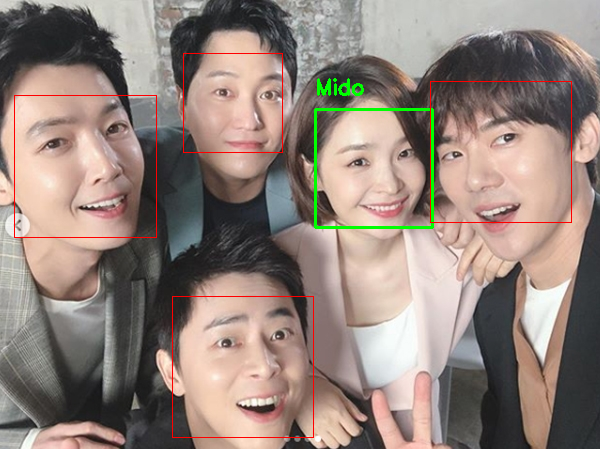

In [18]:
detectAndDisplay(image)

### face_recognition 특징
* face_recognition 패키지는 정확도면에서 한계
* 실전에서는 face landmark를 활용한 전처리 과정(Alignment)를 통해 정확도를 높이고있다.
* 동양인들 끼리의 얼굴 인식은 잘 안된다.